In [51]:
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

ner = spacy.load('en_core_web_sm')


import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from wordcloud import STOPWORDS, WordCloud

rcParams['figure.figsize'] = 15, 7

import re
import threading
import unicodedata
from string import punctuation

import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  Perceptron, SGDClassifier)
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, f1_score,
                             mean_squared_error, confusion_matrix)
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     train_test_split)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from wordcloud import STOPWORDS, WordCloud


In [2]:
zomato = pd.read_csv('Zomato_reviews.csv')
zomato

,rating,review_text
0,1.0,"Their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . I...
2,4.0,"Went there on a Friday night, the place was su..."
3,4.0,A very decent place serving good food.\r\nOrde...
4,5.0,One of the BEST places for steaks in the city....
...,...,...
27757,4.0,Food quality 4.5/5\r\nHospitality 4/5\r\nManag...
27758,4.0,Taste of the food is good and the ambience as ...
27759,5.0,Pizza is really thin crust and made from fresh...
27760,5.0,"Visited last Saturday with my kids ,\r\nIt was..."


In [3]:
zomato.isnull().sum()

rating          0
review_text    14
dtype: int64

In [4]:
zomato.dropna(axis=0, how='any', inplace=True)

In [18]:
print(zomato.isnull().sum())
zomato

rating         0
review_text    0
dtype: int64


,rating,review_text
0,1.0,"Their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . I...
2,4.0,"Went there on a Friday night, the place was su..."
3,4.0,A very decent place serving good food.\r\nOrde...
4,5.0,One of the BEST places for steaks in the city....
...,...,...
27757,4.0,Food quality 4.5/5\r\nHospitality 4/5\r\nManag...
27758,4.0,Taste of the food is good and the ambience as ...
27759,5.0,Pizza is really thin crust and made from fresh...
27760,5.0,"Visited last Saturday with my kids ,\r\nIt was..."


In [6]:
# f1 score since label not balanced
zomato.rating.value_counts()

4.0    8631
5.0    8108
3.0    3761
1.0    3126
2.0    1675
3.5    1077
4.5     932
2.5     261
1.5     177
Name: rating, dtype: int64

In [7]:
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('don')
stop_words.remove('won')

In [9]:
# functions for preprocessing


contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')
    
def remove_linebreaks(text):
    return text.replace('\n', ' ').replace('\r', ' ')

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def pre_process1( text):
    """
    """
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = autospell(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    return ' '.join(text)


def pre_process2(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_Tags(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

def pre_processing3(document):
  #1. Remove Punctuations
  sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
  #2. Extract words out of the sentences
  words = sentWithoutPunct.split()
  #3. Normalize the data (lowercase)
  wordNormalized = [word.lower() for word in words]
  # 4. Remove Stopwords
  vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
  # 5. Apply Stemming
  # a. Exclude those words with NER prop 
  ner_words = [tokens.text for tokens in ner(document).ents]
  # b. perform Stemming with other words
  stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

  return stemmed

def preprocess_4(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'@', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)
    
    text = remove_linebreaks(text)
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    
    return ' '.join(text)


In [32]:
features = zomato.review_text.apply(preprocess_4)
label = zomato['rating'].astype(str)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42, stratify=label)

In [67]:
tfidfvect = TfidfVectorizer(max_features=5000)
tfidfvect = tfidfvect.fit(X_train, y_train)
tfidfObject_train = tfidfvect.transform(X_train)
tfidfObject_test = tfidfvect.transform(X_test)

In [68]:
rfclf = RandomForestClassifier()
rfclf.fit(tfidfObject_train, y_train)

y_pred_train = rfclf.predict(tfidfObject_train)
y_pred_test = rfclf.predict(tfidfObject_test)


accuracy train: 0.9860474694949287
accuracy test: 0.8540540540540541


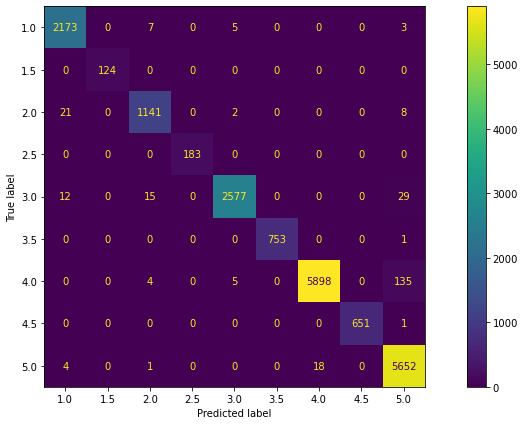

In [69]:
print('accuracy train:', accuracy_score(y_train, y_pred_train))
print('accuracy test:', accuracy_score(y_test, y_pred_test))
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels= rfclf.classes_).plot()

In [76]:
sfcv = StratifiedKFold(n_splits=5)
param_grid = {'max_features': ('auto', 'sqrt', 'log2'),
              'max_depth': (10, 15, 20, 25)}

clf = RandomForestClassifier(random_state=42, n_jobs=-1)

search = GridSearchCV(estimator= clf, param_grid= param_grid, scoring='accuracy', cv=sfcv, refit='f1', n_jobs=-1)

search.fit(tfidfObject_train, y_train)
print("Best parameter (CV score={0:0.2f}%):".format(search.best_score_*100))
print(search.best_params_)

y_pred_train = search.predict(tfidfObject_train)
y_pred_test = search.predict(tfidfObject_test)
print('grid search best accuracy train:', accuracy_score(y_train, y_pred_train))
print('grid search best accuracy test:', accuracy_score(y_test, y_pred_test))


Best parameter (CV score=70.50%):
{'max_depth': 25, 'max_features': 'auto'}
grid search best accuracy train: 0.7863357874684652
grid search best accuracy test: 0.713033033033033


In [78]:
rfclf.set_params(**search.best_params_)
print('setting new params on clf: ', rfclf.get_params())
rfclf.fit(tfidfObject_train, y_train)

y_pred_train = rfclf.predict(tfidfObject_train)
y_pred_test = rfclf.predict(tfidfObject_test)

setting new params on clf:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


accuracy train: 0.7863357874684652
accuracy test: 0.713033033033033


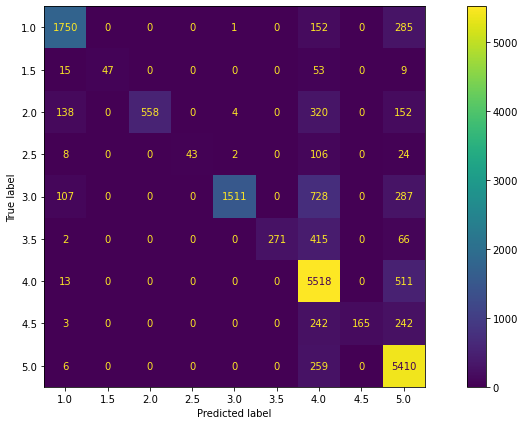

In [79]:
print('accuracy train:', accuracy_score(y_train, y_pred_train))
print('accuracy test:', accuracy_score(y_test, y_pred_test))
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix= cm1, display_labels= rfclf.classes_).plot()